DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/texttable-1.7.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/nvfuser-0.2.13a0+0d33366-py3.12-linux-x86_64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/igraph-0.11.8-py3.12-linux-x86_64.egg is deprecated. pip 

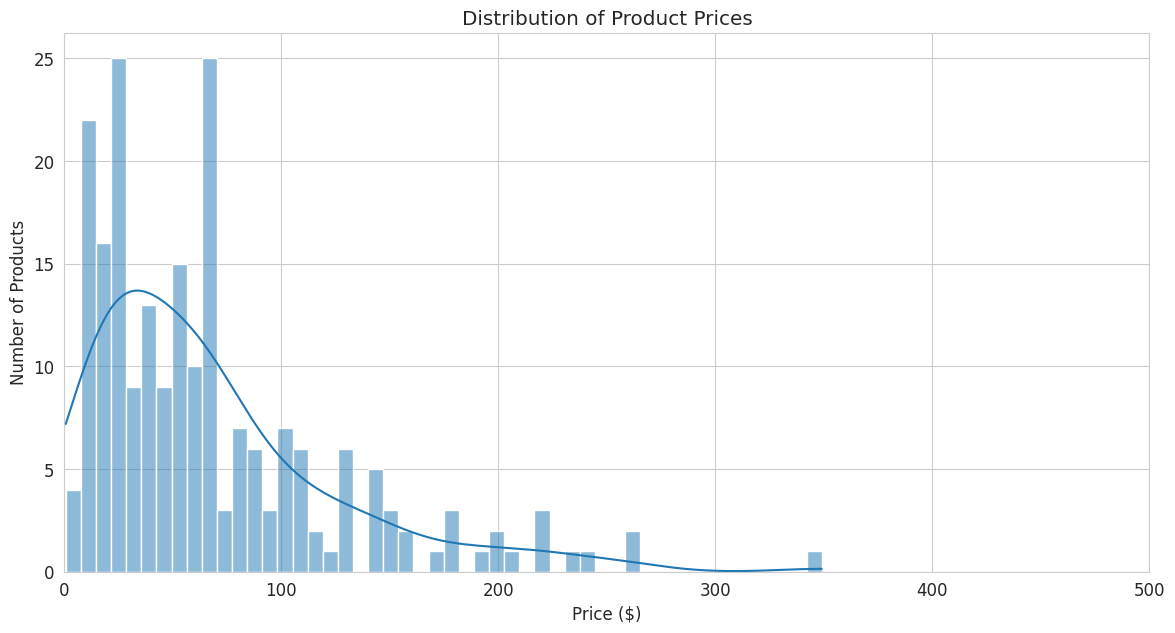

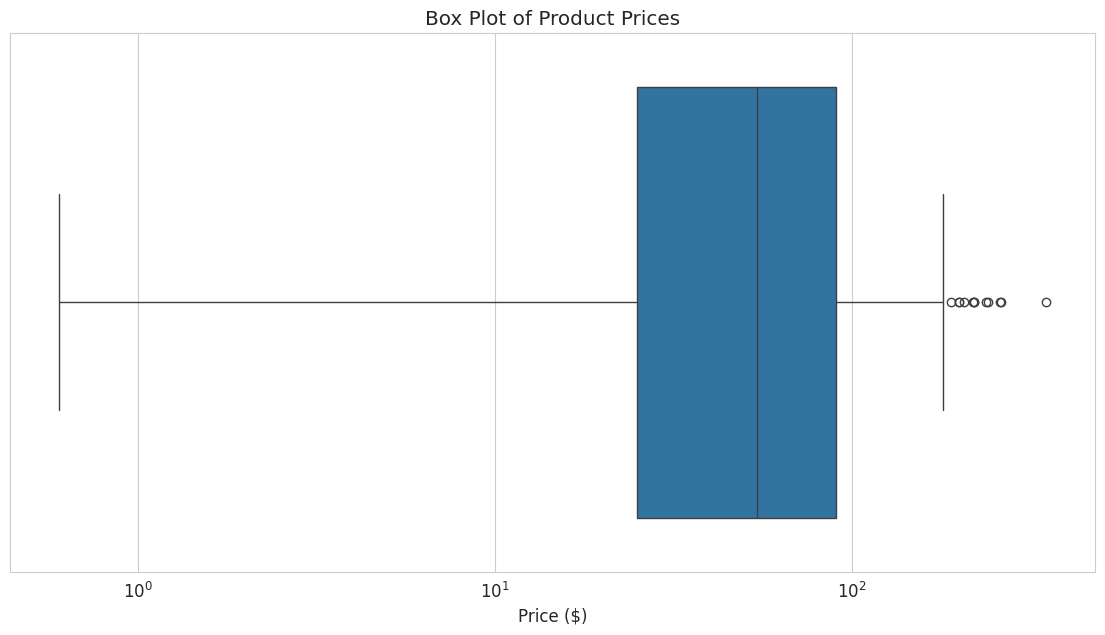

/tmp/ipykernel_431405/1279180934.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_brands.index, x=top_brands.values, palette='viridis')


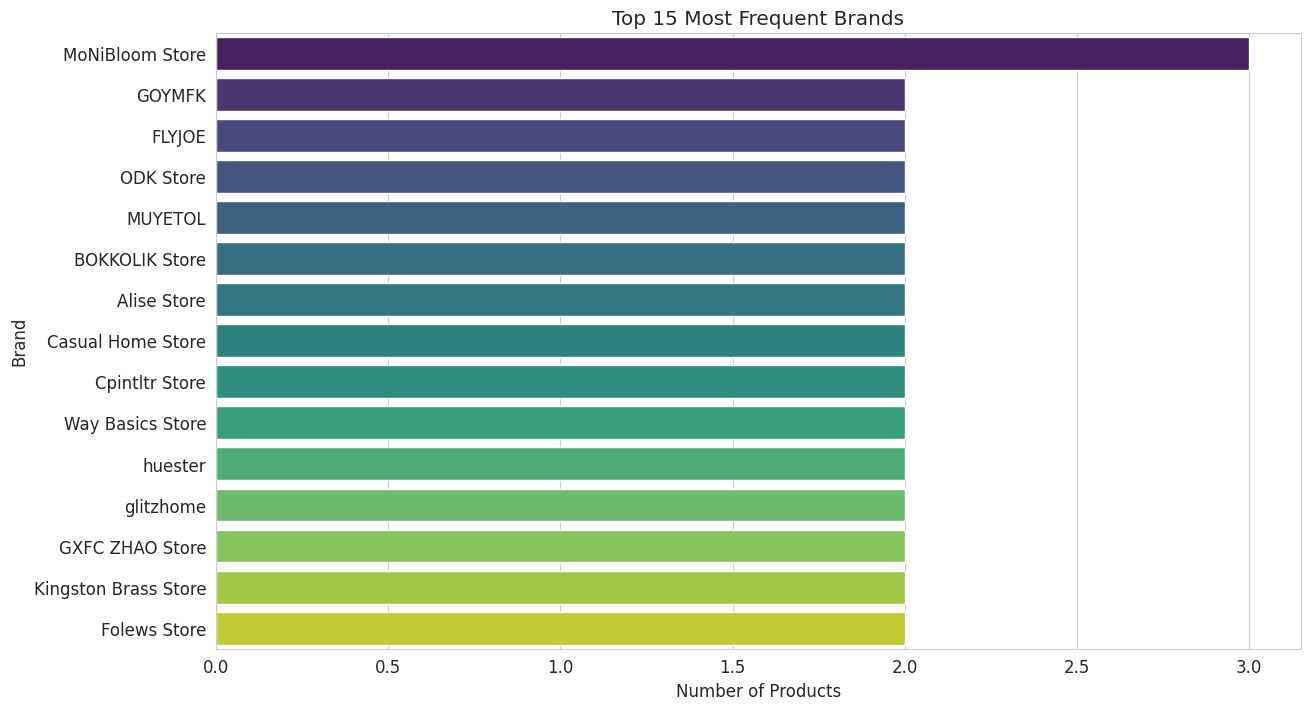

/tmp/ipykernel_431405/1279180934.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='plasma')


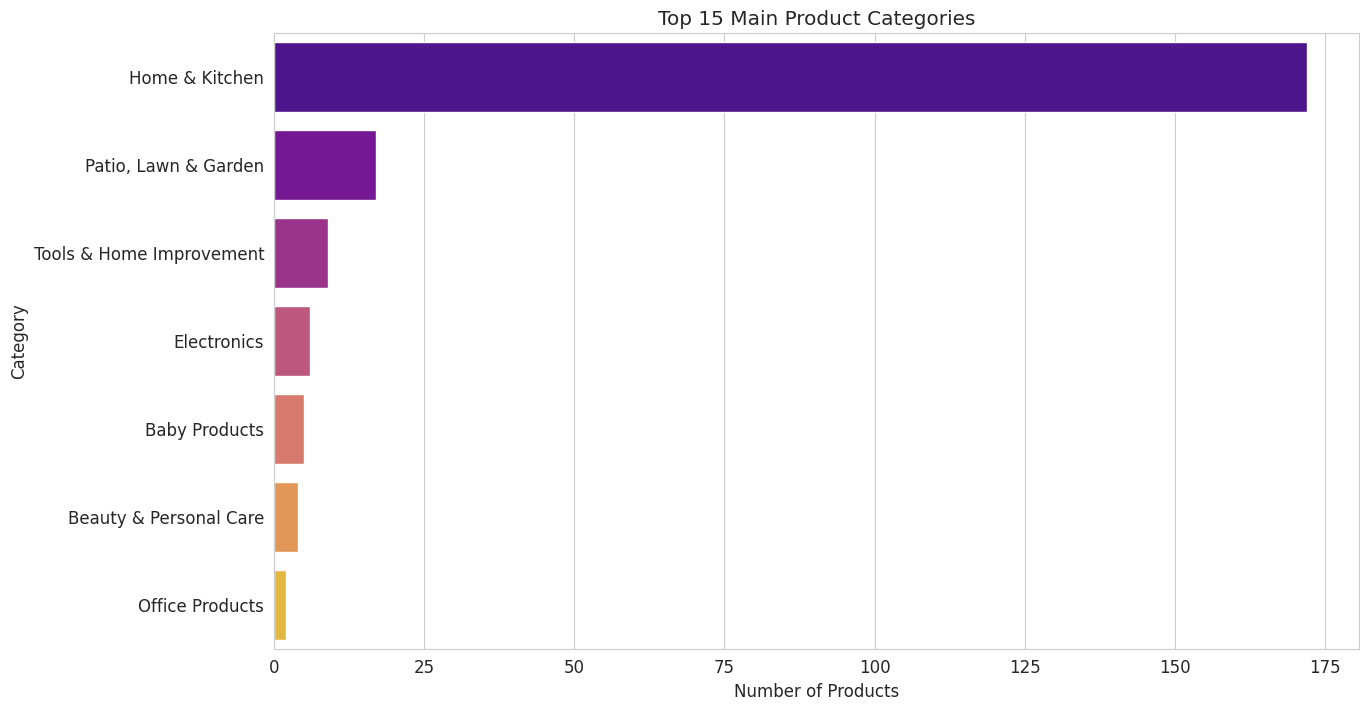

/tmp/ipykernel_431405/1279180934.py:169: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_materials.index, x=top_materials.values, palette='magma')


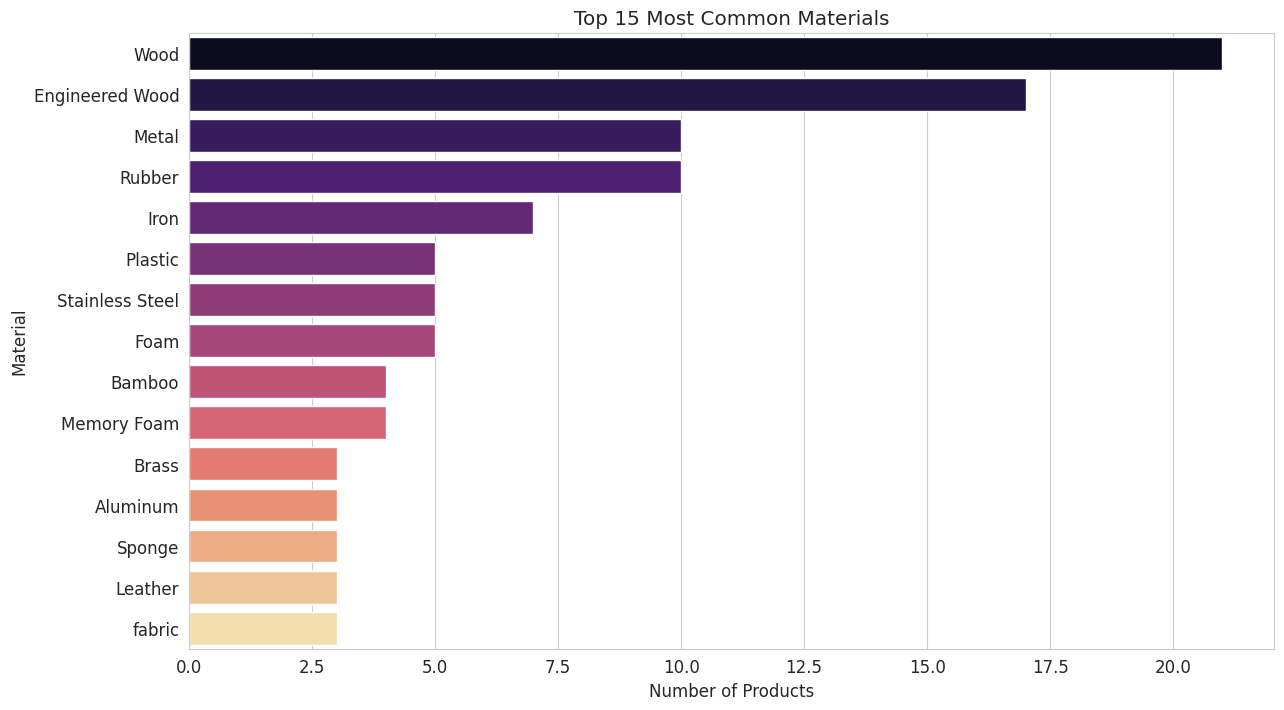

/tmp/ipykernel_431405/1279180934.py:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_colors.index, x=top_colors.values, palette='cividis')


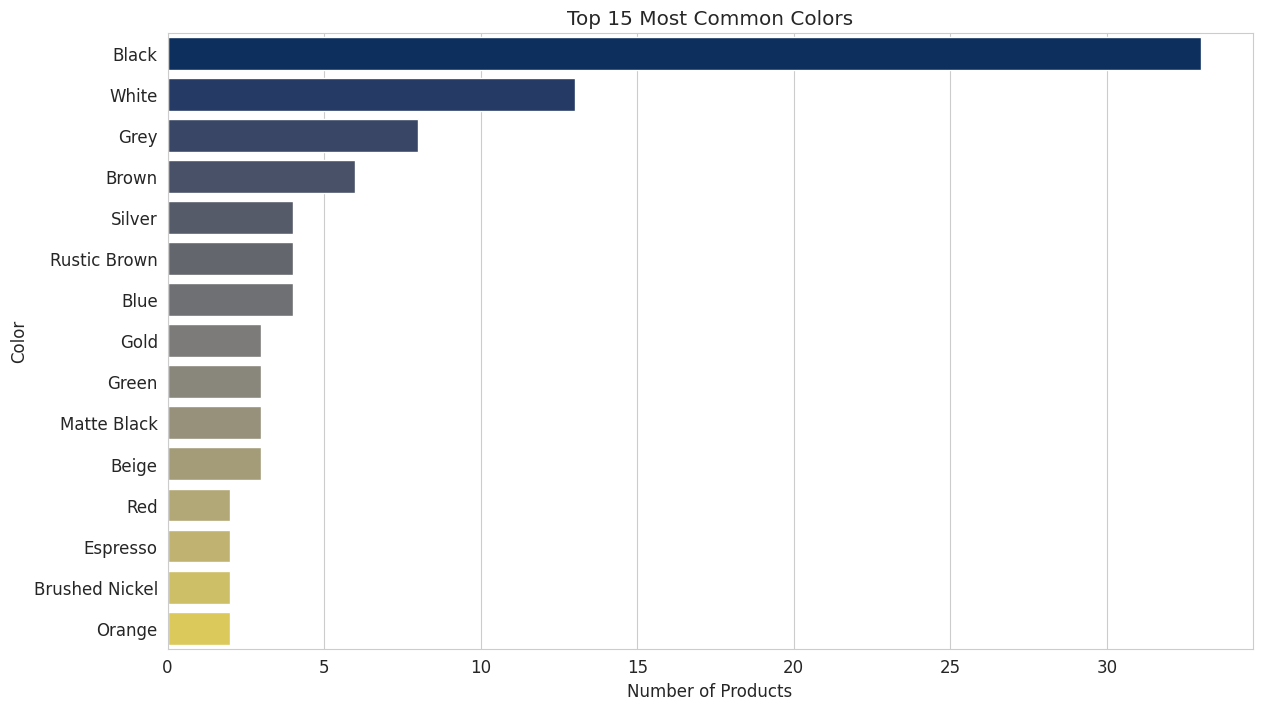

/tmp/ipykernel_431405/1279180934.py:190: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='cubehelix')


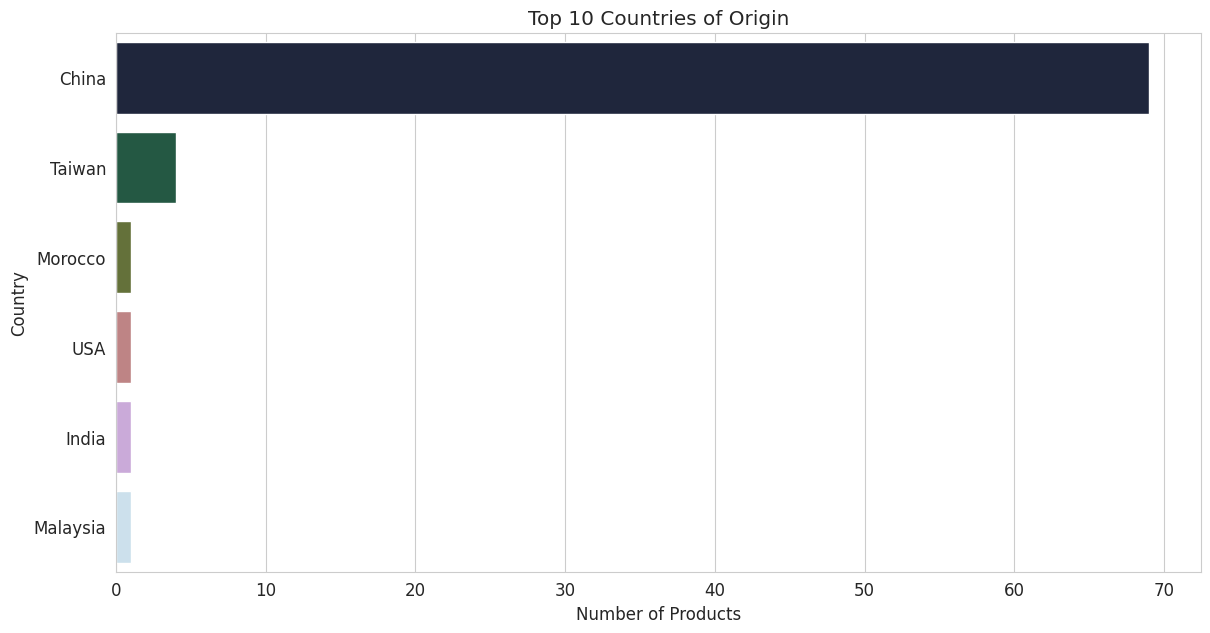

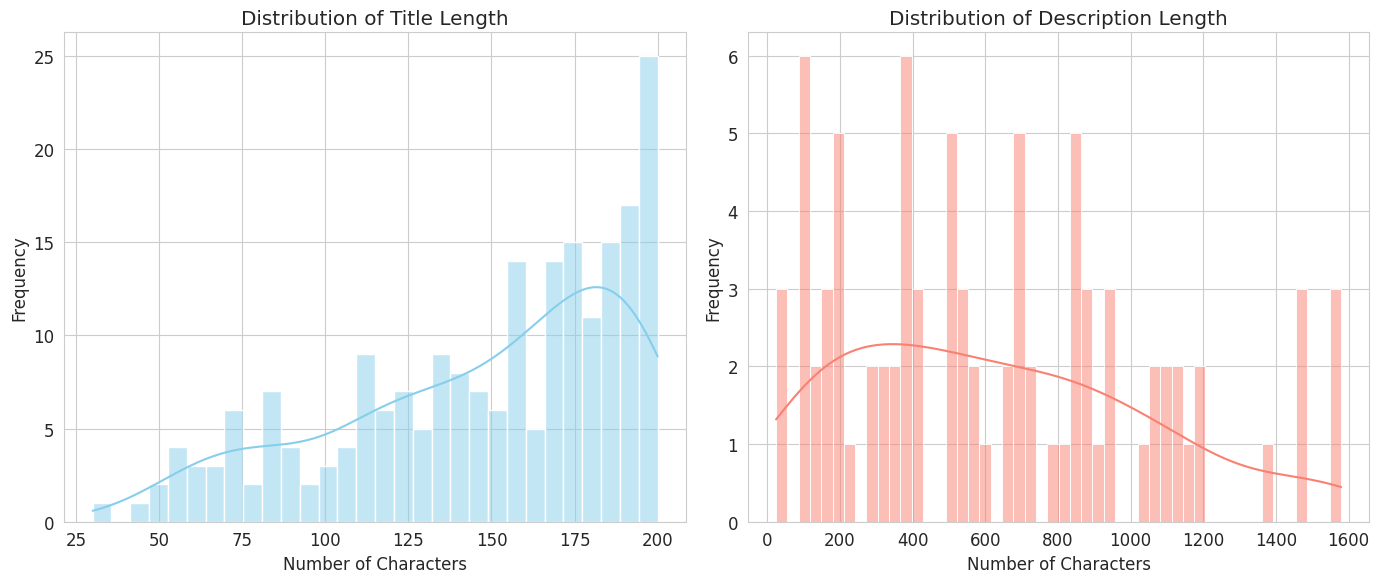

In [2]:
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: light
#       format_version: '1.5'
#       jupytext_version: 1.16.2
#   kernelspec:
#     display_name: Python 3
#     language: python
#     name: python3
# ---

# # Exploratory Data Analysis (EDA) of Furniture Dataset
#
# **Objective:** This notebook performs a detailed exploratory data analysis on the furniture product dataset. The goal is to understand the data's structure, uncover patterns, and derive insights that could be valuable for the "Analytics Page" of the final web application.
#
# **Key Tasks:**
# 1.  **Data Loading & Initial Inspection:** Load the dataset and examine its basic properties.
# 2.  **Data Cleaning for Analytics:** Clean specific columns like 'price' and 'categories' for visualization.
# 3.  **Price Analysis:** Analyze the distribution and range of product prices.
# 4.  **Categorical Analysis:** Investigate the distribution of key categorical features like brand, material, color, and country of origin.
# 5.  **Text Analysis:** Perform a basic analysis of the text data in the 'title' and 'description' fields.
#
# **Folder Structure Context:**
# ```


# ## Step 1: Setup and Installations
#
# We'll install `matplotlib` and `seaborn` for data visualization.

# +
!pip install -q pandas matplotlib seaborn
# -

# ## Step 2: Import Libraries and Load Data

# +
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast # Used for safely evaluating string representations of lists
from collections import Counter

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
# -

# Load the dataset.
try:
    df = pd.read_csv('intern_data_ikarus.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure 'intern_data_ikarus.csv' is in the root 'data' directory.")

# ## Step 3: Initial Data Inspection
#
# Let's get a first look at the data's structure, types, and summary statistics.

df.info()

# Check for missing values
print("Missing values per column:")
df.isnull().sum()

df.describe(include='object')

# ## Step 4: Data Cleaning for Analytics
#
# Some columns need to be cleaned and converted to the correct data types before we can analyze them effectively.

# ### Price Column
# The 'price' column is an object (string) with '$' signs. We need to convert it to a numeric type.
def clean_price(price_str):
    if isinstance(price_str, str):
        try:
            # Remove '$' and commas, then convert to float
            return float(price_str.replace('$', '').replace(',', ''))
        except (ValueError, AttributeError):
            # Return NaN for prices that can't be converted
            return np.nan
    return price_str

df['price_numeric'] = df['price'].apply(clean_price)

# Drop rows where price could not be converted, as they can't be analyzed
df_clean = df.dropna(subset=['price_numeric']).copy()
print(f"Removed {len(df) - len(df_clean)} rows with invalid price data.")

# ### Categories Column
# The 'categories' column is also a string that looks like a list. We'll parse it to extract individual categories.
def parse_categories(cat_str):
    try:
        # ast.literal_eval safely evaluates the string as a Python literal (a list)
        return ast.literal_eval(cat_str)
    except (ValueError, SyntaxError):
        return []

df_clean['category_list'] = df_clean['categories'].apply(parse_categories)
df_clean.head()

# ## Step 5: Price Analysis
#
# Let's explore the distribution of product prices.

print("Descriptive statistics for Price:")
print(df_clean['price_numeric'].describe())

plt.figure(figsize=(14, 7))
sns.histplot(df_clean['price_numeric'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.xlim(0, 500) # Limiting x-axis to see the distribution of lower-priced items more clearly
plt.show()

# A boxplot can help visualize the quartiles and identify outliers.
plt.figure(figsize=(14, 7))
sns.boxplot(x=df_clean['price_numeric'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price ($)')
plt.xscale('log') # Use a log scale to better visualize the spread of prices
plt.show()

# ## Step 6: Categorical Feature Analysis

# ### Top Product Brands
top_brands = df_clean['brand'].value_counts().nlargest(15)

plt.figure(figsize=(14, 8))
sns.barplot(y=top_brands.index, x=top_brands.values, palette='viridis')
plt.title('Top 15 Most Frequent Brands')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()

# ### Top Product Categories
# We'll analyze the first category listed for each product to get a sense of the main product groups.
df_clean['main_category'] = df_clean['category_list'].apply(lambda x: x[0] if x else 'Unknown')
top_categories = df_clean['main_category'].value_counts().nlargest(15)

plt.figure(figsize=(14, 8))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='plasma')
plt.title('Top 15 Main Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

# ### Most Common Materials
top_materials = df_clean['material'].value_counts().nlargest(15)

# We'll ignore blank/empty strings in the visualization
top_materials = top_materials[top_materials.index != '']

plt.figure(figsize=(14, 8))
sns.barplot(y=top_materials.index, x=top_materials.values, palette='magma')
plt.title('Top 15 Most Common Materials')
plt.xlabel('Number of Products')
plt.ylabel('Material')
plt.show()

# ### Most Common Colors
top_colors = df_clean['color'].value_counts().nlargest(15)
top_colors = top_colors[top_colors.index != '']

plt.figure(figsize=(14, 8))
sns.barplot(y=top_colors.index, x=top_colors.values, palette='cividis')
plt.title('Top 15 Most Common Colors')
plt.xlabel('Number of Products')
plt.ylabel('Color')
plt.show()

# ### Country of Origin
top_countries = df_clean['country_of_origin'].value_counts().nlargest(10)

plt.figure(figsize=(14, 7))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='cubehelix')
plt.title('Top 10 Countries of Origin')
plt.xlabel('Number of Products')
plt.ylabel('Country')
plt.show()

# ## Step 7: Text Data Analysis
#
# Let's do a simple analysis of the length of titles and descriptions.

df_clean['title_length'] = df_clean['title'].str.len()
df_clean['description_length'] = df_clean['description'].str.len()

plt.figure(figsize=(14, 6))

# Plot title length
plt.subplot(1, 2, 1)
sns.histplot(df_clean['title_length'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Title Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Plot description length
plt.subplot(1, 2, 2)
sns.histplot(df_clean['description_length'], bins=50, color='salmon', kde=True)
plt.title('Distribution of Description Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# ## Conclusion & Key Insights
#
# This exploratory analysis has provided several key insights into the furniture dataset:
#
# 1.  **Price Distribution:** The majority of products are priced below $100, with a long tail of more expensive items. This suggests the catalog is skewed towards more affordable furniture.
#
# 2.  **Dominant Brands & Categories:** There are a few dominant brands in the dataset. The primary categories are 'Home & Kitchen' and 'Storage & Organization', indicating a focus on practical home goods.
#
# 3.  **Popular Attributes:** Engineered Wood, Metal, and Wood are the most common materials. Neutral colors like White and Black are highly prevalent.
#
# 4.  **Geographic Origin:** A significant portion of the products originate from China.
#
# 5.  **Text Content:** Product titles are generally concise, while descriptions have a much wider range of lengths, with many being quite brief.
#
# These insights are valuable for building the analytics dashboard, as they highlight the most important features to track and display. For example, a dashboard could feature filters for brand, category, and price range, and display charts similar to the ones generated here.
